# 0 kaggleの準備
・googledriveのマウント \
・kaggle.jsonの読み込み \
・train、testデータの読み込み \

In [ ]:
!pip install https://github.com/ipython-contrib/jupyter_contrib_nbextensions/tarball/master
!jupyter contrib nbextension install --user
!jupyter nbextension enable hinterland/hinterland

In [ ]:
# KaggleのAPIを利用ためのインストール
!pip install kaggle

In [3]:
from google.colab import drive
from google.colab import files
import os
import json

# Googleドライブをマウント
drive.mount("/content/drive")

# KaggleのAPIを利用するための設定
# 初回のみJSONファイルをダウンロードして、Google Driveに保存する必要がある
f = open("/content/drive/MyDrive/Colab Notebooks/kaggle.json", 'r')
json_data = json.load(f)
os.environ['KAGGLE_USERNAME'] = json_data['username']
os.environ['KAGGLE_KEY'] = json_data['key']

# Kaggleの各コンペページから、APIコマンドを取得し実施
# 今回は「Doenload(8MB)」の横にある縦3点リーダの中にある「Copy API command」をクリックした取得した
!kaggle competitions download -c playground-series-s4e2

# # !unzip <ダウンロードしたZIPファイル>
!unzip '/content/playground-series-s4e2.zip'


Mounted at /content/drive
  0% 0.00/917k [00:00<?, ?B/s]
100% 917k/917k [00:00<00:00, 116MB/s]
Archive:  /content/playground-series-s4e2.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# 1 データ読み込み

In [4]:
import numpy as np
import pandas as pd

In [5]:
train = pd.read_csv("/content/train.csv").set_index("id")
test = pd.read_csv("/content/test.csv").set_index("id")

In [6]:
train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


# 2 特徴量分析 -> 実施せず
BMIを追加した結果、スコアが悪化したため、今回はひとまず特徴量をそのまま用いる

In [7]:
# train['BMI'] = train['Weight'] / (train['Height'] ** 2)
# test['BMI'] = test['Weight'] / (test['Height'] ** 2)
# train = train.drop(columns=['Weight','Height'])
# test = test.drop(columns=['Weight','Height'])

# 3 Pycaretによるモデル学習



In [8]:
! pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 89.2 MB

In [9]:
from pycaret.classification import *

## 3.1 データのセットアップ

In [10]:
# session_id はPyCaretの実行時の識別子で、内部的には乱数のseedとしている
# （scikit-learnにおける「random_state」に近いイメージですね。）
setup_train_data = setup(data = train, target = 'NObeyesdad', session_id = 123)

,Description,Value
0,Session id,123
1,Target,NObeyesdad
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(20758, 17)"
5,Transformed data shape,"(20758, 26)"
6,Transformed train set shape,"(14530, 26)"
7,Transformed test set shape,"(6228, 26)"
8,Numeric features,8
9,Categorical features,8


数値データとラベルデータを区別し、
ラベルデータについてはOne-Hotエンコーディングされている

In [11]:
setup_train_data.X_train_transformed.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC_Sometimes,CAEC_Always,...,FAF,TUE,CALC_no,CALC_Sometimes,CALC_Frequently,MTRANS_Automobile,MTRANS_Public_Transportation,MTRANS_Walking,MTRANS_Motorbike,MTRANS_Bike
id,,,,,,,,,,,,,,,,,,,,,
9027,1.0,32.997120,1.681080,79.989792,1.0,1.0,2.948248,2.669766,1.0,0.0,...,1.482411,0.673835,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12293,1.0,26.945139,1.773259,121.284531,1.0,1.0,2.265973,3.000000,1.0,0.0,...,0.852446,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9686,0.0,39.000000,1.650000,80.000000,1.0,1.0,2.000000,3.000000,0.0,1.0,...,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7700,1.0,18.000000,1.706530,52.058334,1.0,1.0,2.886157,3.000000,1.0,0.0,...,0.417119,1.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8110,0.0,18.198322,1.647514,68.869789,1.0,1.0,1.572230,3.000000,1.0,0.0,...,0.000000,1.551934,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## 3.2 LightGBM
はじめに、予測制度の高いLightGBMで精度を確認 \
`create_model`関数にlightｇｂｍを引数にとると、\
自動でモデルを生成し、交差検証を行なう。


In [12]:
model = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9009,0.0000,0.9009,0.9006,0.9006,0.8838,0.8838
1,0.8961,0.0000,0.8961,0.8954,0.8957,0.8781,0.8781
2,0.9030,0.0000,0.9030,0.9033,0.9028,0.8862,0.8863
3,0.9016,0.0000,0.9016,0.9004,0.9006,0.8846,0.8847
4,0.9023,0.0000,0.9023,0.9020,0.9015,0.8853,0.8855
5,0.9023,0.0000,0.9023,0.9036,0.9027,0.8854,0.8854
6,0.8926,0.0000,0.8926,0.8931,0.8928,0.8741,0.8741
7,0.8933,0.0000,0.8933,0.8928,0.8928,0.8748,0.8749
8,0.9160,0.0000,0.9160,0.9163,0.9160,0.9015,0.9016


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

各特徴量の影響度を可視化
体重、身長、年齢の順で影響量が大きいことがわかる

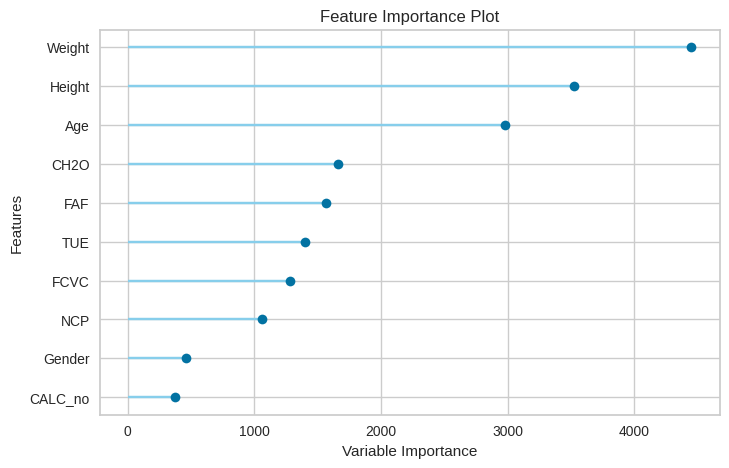

In [13]:
plot_model(model, plot='feature')

## 3.3 モデル比較
各モデルでスコアを計算し、ベスト3のモデルをブレンドモデルとして採用

In [14]:
base_model = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9025,0.0000,0.9025,0.9025,0.9023,0.8857,0.8858,11.3700
gbc,Gradient Boosting Classifier,0.9001,0.0000,0.9001,0.8998,0.8997,0.8828,0.8829,14.3260
xgboost,Extreme Gradient Boosting,0.8999,0.0000,0.8999,0.8997,0.8995,0.8825,0.8826,1.9620
rf,Random Forest Classifier,0.8909,0.0000,0.8909,0.8909,0.8904,0.8720,0.8722,2.1630
et,Extra Trees Classifier,0.8628,0.0000,0.8628,0.8627,0.8622,0.8391,0.8392,1.7590
dt,Decision Tree Classifier,0.8435,0.0000,0.8435,0.8441,0.8437,0.8164,0.8165,0.3400
knn,K Neighbors Classifier,0.8399,0.0000,0.8399,0.8389,0.8386,0.8123,0.8125,0.4880
lr,Logistic Regression,0.8248,0.0000,0.8248,0.8206,0.8218,0.7944,0.7946,3.9950
lda,Linear Discriminant Analysis,0.8226,0.0000,0.8226,0.8211,0.8210,0.7920,0.7923,0.4450
ridge,Ridge Classifier,0.6401,0.0000,0.6401,0.6302,0.6055,0.5756,0.5834,0.2710


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [15]:
blended_model = blend_models(base_model)
# tuned_blender = tune_model(blender, choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9030,0.0000,0.9030,0.9024,0.9026,0.8862,0.8862
1,0.8954,0.0000,0.8954,0.8949,0.8951,0.8773,0.8773
2,0.9030,0.0000,0.9030,0.9033,0.9029,0.8862,0.8863
3,0.9092,0.0000,0.9092,0.9082,0.9081,0.8935,0.8936
4,0.9078,0.0000,0.9078,0.9074,0.9072,0.8918,0.8919
5,0.9016,0.0000,0.9016,0.9025,0.9018,0.8846,0.8846
6,0.8919,0.0000,0.8919,0.8926,0.8921,0.8733,0.8734
7,0.8981,0.0000,0.8981,0.8977,0.8977,0.8805,0.8806
8,0.9119,0.0000,0.9119,0.9122,0.9120,0.8967,0.8967


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

## 3.4 ブレンドモデルによる予測
今回はLightGBM単独よりもスコアがよかったblendモデルを採用

In [16]:
# final_model = finalize_model(tuned_blender) #0.91184
# final_model = finalize_model(model) #0.91004
final_model = finalize_model(blended_model) #0.91329
result = predict_model(final_model, data = test)

In [17]:
result

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,prediction_label,prediction_score
id,,,,,,,,,,,,,,,,,,
20758,Male,26.899885,1.848294,120.644180,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation,Obesity_Type_II,0.9979
20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I,0.9584
20760,Female,26.000000,1.643355,111.600555,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation,Obesity_Type_III,0.9997
20761,Male,20.979254,1.553127,103.669113,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation,Obesity_Type_I,0.9724
20762,Female,26.000000,1.627396,104.835342,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation,Obesity_Type_III,0.9975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,Male,23.327835,1.721384,78.030380,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation,Overweight_Level_II,0.9450
34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I,0.7158
34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,0.9898


In [18]:
result['prediction_label'].to_csv("/content/xgb_submission_blended_model.csv", index=True)

# 4 Kaggle提出

In [19]:
# !kaggle competitions submit -c playground-series-s4e2 -f xgb_submission.csv -m "Message"
# !kaggle competitions submit -c playground-series-s4e2 -f xgb_submission_tuned_blender.csv -m "Message"
# !kaggle competitions submit -c playground-series-s4e2 -f xgb_submission_blended_model.csv -m "Message"